**Import libraries**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import random
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.math import confusion_matrix
import seaborn as sns
tf.random.set_seed(3)

2024-05-12 18:44:58.729325: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-12 18:44:58.729491: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-12 18:44:58.901703: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


**Display images from classes**

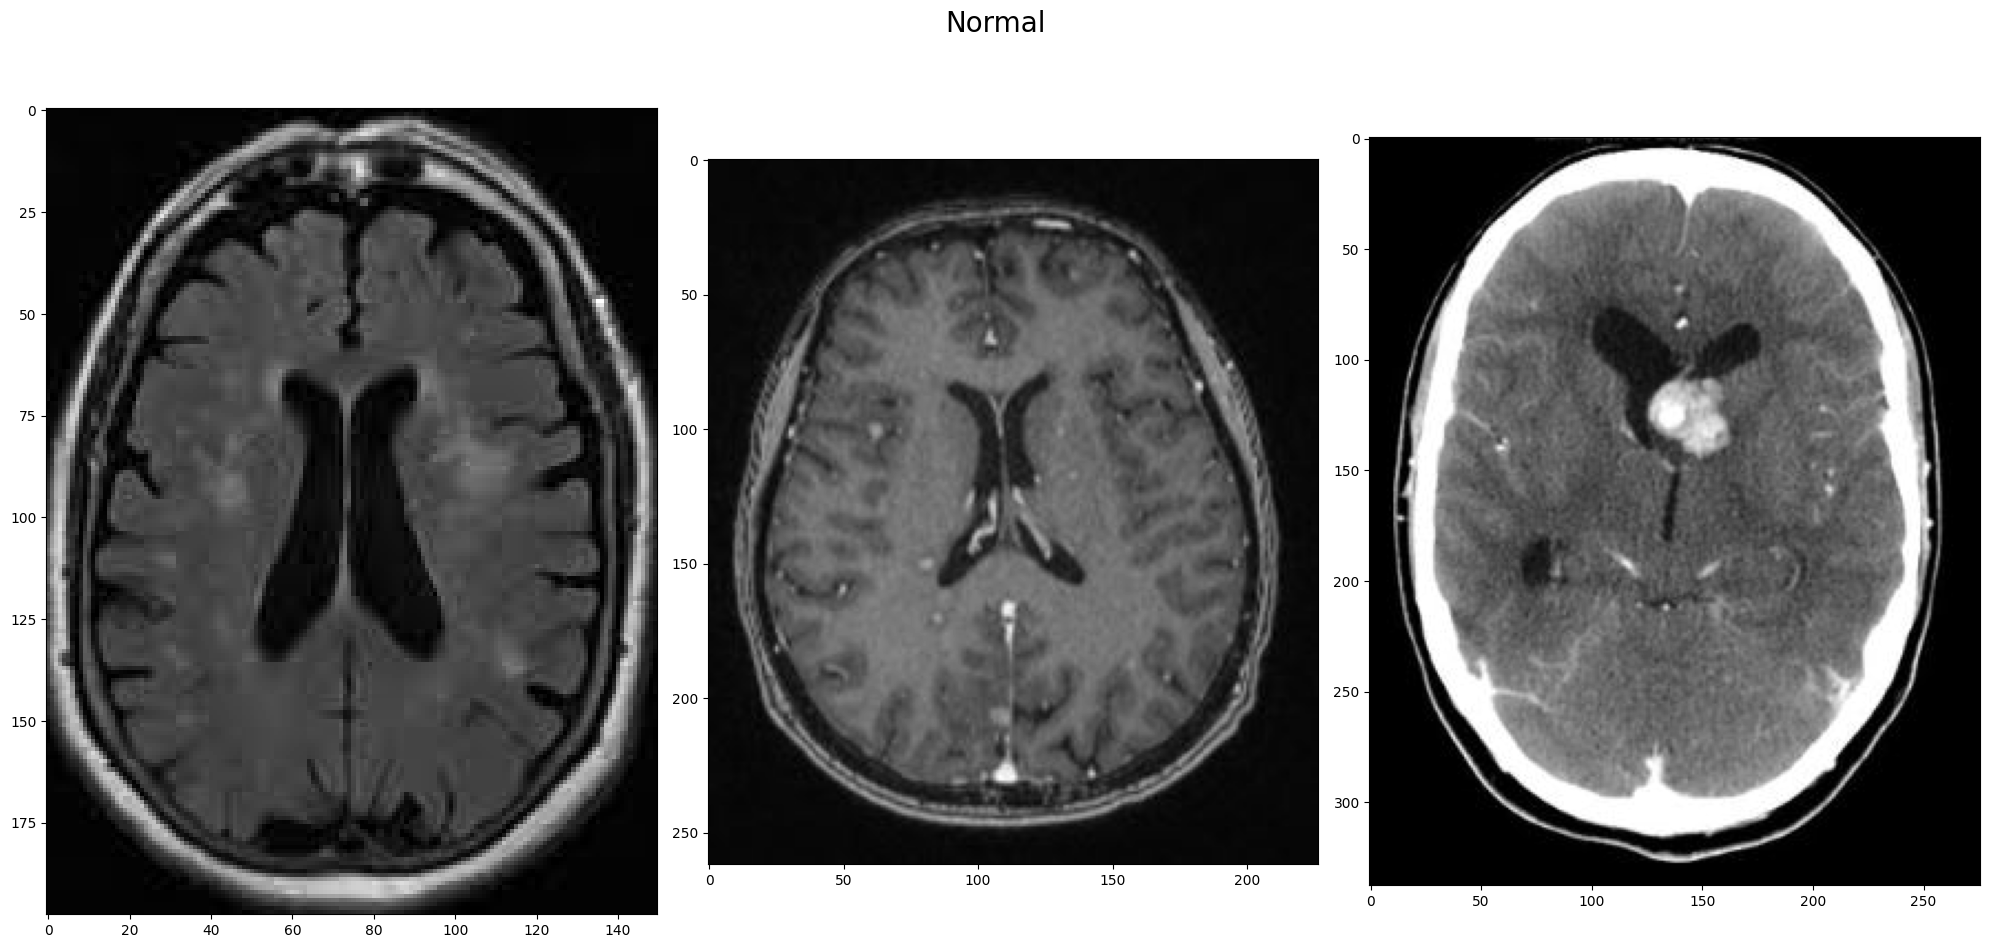

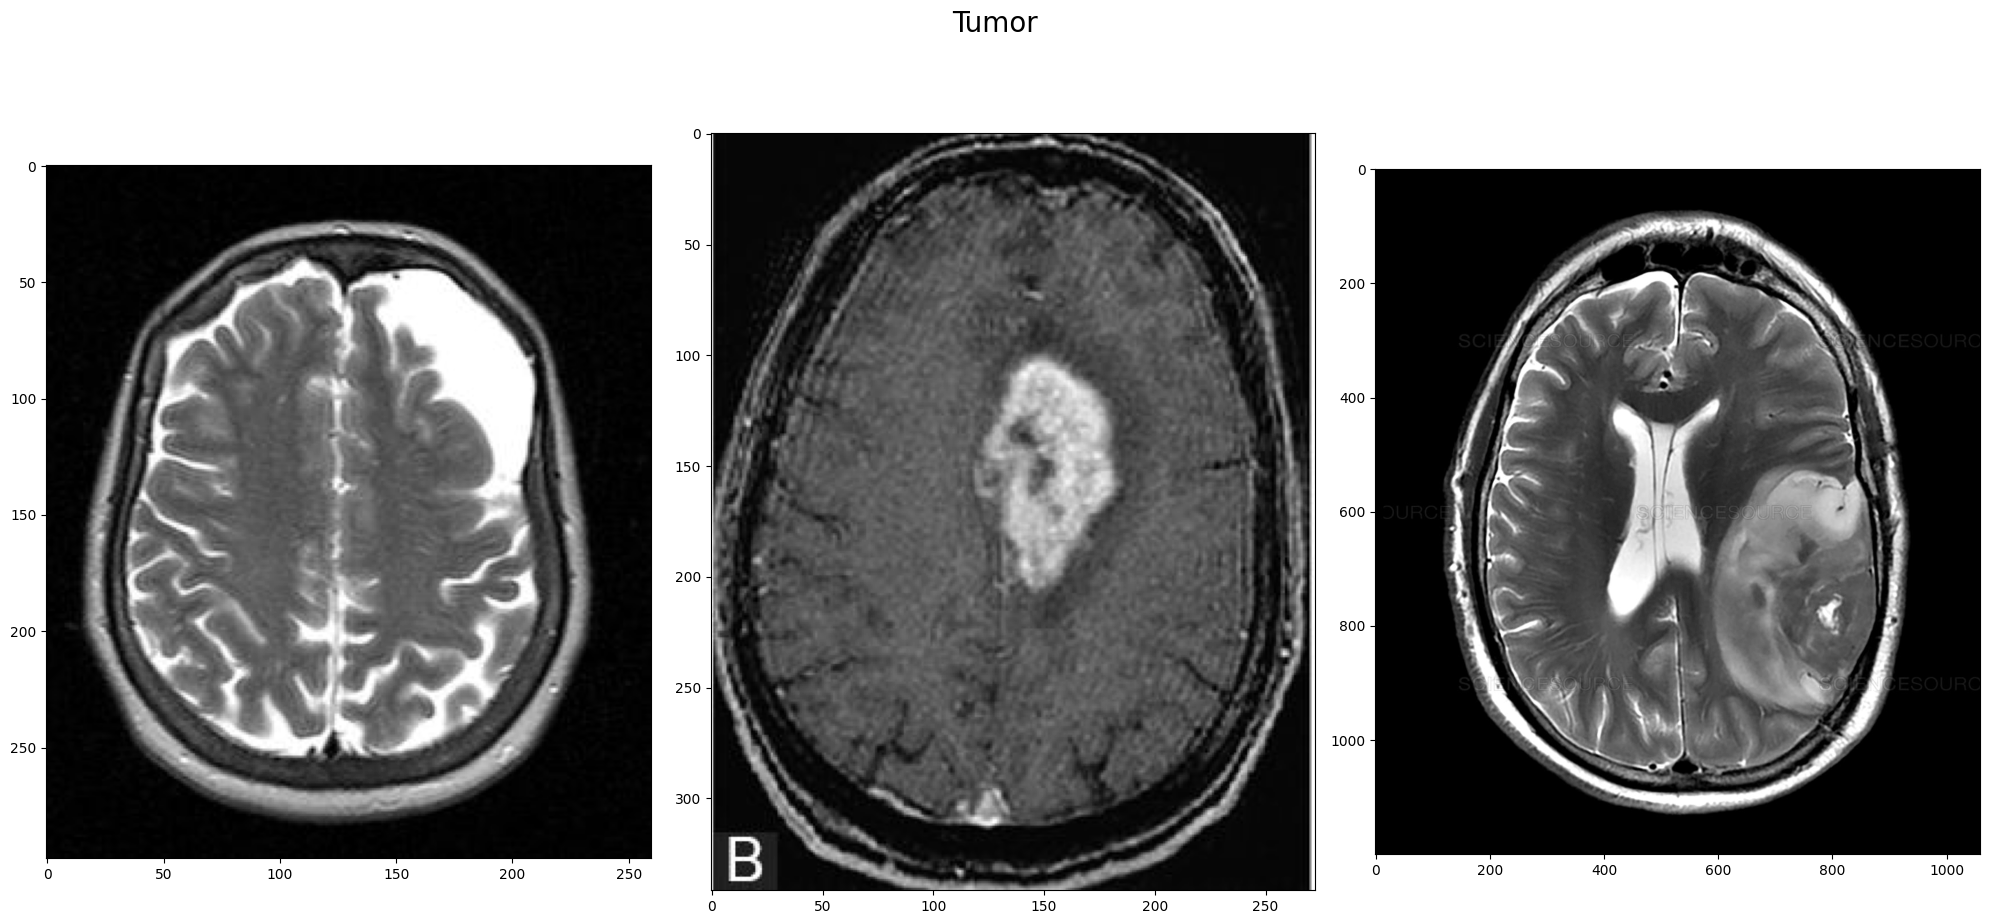

In [2]:
DATADIR = '/kaggle/input/brain-mri-images-for-brain-tumor-detection'
CATEGORIES = {'no':'Normal', 'yes':'Tumor'}
x=0
for key, value in CATEGORIES.items():  # do dogs and cats
    path = os.path.join(DATADIR,key)  # create path to dogs and cats
    
    x=0
    fig, axes = plt.subplots(1,3, figsize=(20, 10))
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        axes[x].imshow(img_array, cmap='gray')  # graph it
        x+=1
  
        if x==3 : 
            break  
    
    plt.suptitle(value, fontsize=20)
    plt.tight_layout()
    plt.show()

**Display image with size 200*200**

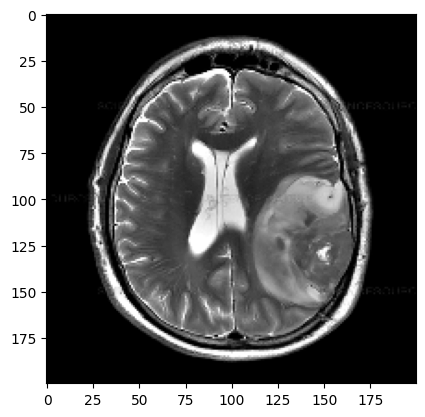

In [3]:
IMG_SIZE = 200

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

**Loading Data**

In [4]:
training_data = []

def create_training_data():
    class_num = 0
    for key, value in CATEGORIES.items():  # do dogs and cats
        path = os.path.join(DATADIR,key)
        
        print(value,class_num)
        
        for img in tqdm(os.listdir(path)):
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # Include resizing
            training_data.append([new_array, class_num])
        class_num += 1

create_training_data()

Normal 0


100%|██████████| 98/98 [00:00<00:00, 160.91it/s]


Tumor 1


100%|██████████| 155/155 [00:01<00:00, 151.03it/s]


In [5]:
len(training_data)

253

* **training_data from 0 to 98 is normal and the rest is tumor so we have to shuffle it**

In [6]:
random.shuffle(training_data)

for i in range(10):
    if training_data[i][1]==0:
        print(f"Sample {i+1}: Normal ")
    else:
        print(f"Sample {i+1}: Tumor  ")
    print()

Sample 1: Normal 

Sample 2: Normal 

Sample 3: Tumor  

Sample 4: Normal 

Sample 5: Tumor  

Sample 6: Tumor  

Sample 7: Normal 

Sample 8: Tumor  

Sample 9: Normal 

Sample 10: Normal 



**Preprocessing**

In [7]:
X=[]
y=[]

for feature,label in training_data:
    X.append(feature)
    y.append(label)


X=np.array(X)
y=np.array(y)

print(X.shape)
print(y.shape)

(253, 200, 200)
(253,)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)


print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(202, 200, 200)
(202,)
(51, 200, 200)
(51,)


In [9]:
train_images = tf.keras.utils.normalize(X_train, axis=1)
test_images = tf.keras.utils.normalize(X_test, axis=1)
# you can normalize them manually  by dividing by 255

**Building Model**

In [10]:
model = keras.Sequential([
                          keras.layers.Flatten(),
                          keras.layers.Dense(128, activation='relu'), 
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(64, activation='relu'), 
                          keras.layers.Dense(32, activation='relu'),
                          keras.layers.Dense(2, activation='softmax')
])

In [11]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.6019 - loss: 290.1080
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5602 - loss: 157.3034
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7428 - loss: 41.4886
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.6091 - loss: 40.4905
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6242 - loss: 95.6193
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6109 - loss: 110.7547
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5936 - loss: 222.8622
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7309 - loss: 78.1191
Epoch 9/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8175 - loss: 31.6009
Epoch 10/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8576 - loss: 18.4280
Epoch 11/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7620 - loss: 27.0462
Epoch 12/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.8306 -

In [13]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 40000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     5,120,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,441,128 (58.90 MB)

 Trainable params: 5,147,042 (19.63 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 10,294,086 (39.27 MB)

None


**Evaluation**

In [14]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Accuarcy of the model is : {accuracy*100:.2f} %")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8172 - loss: 86.7801 
Accuarcy of the model is : 80.39 %


**Prediction**

In [15]:
y_pred = model.predict(X_test)
y_pred = [np.argmax(i) for i in y_pred]
print(y_pred)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
[0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1]


In [16]:
for i in range(20):
    if i==0:
        print("Actual", "Prediction")
    print(" ",y_test[i],"     ", y_pred[i])

Actual Prediction
  0       0
  1       0
  0       0
  1       1
  0       0
  1       1
  1       1
  0       1
  1       1
  0       0
  0       1
  1       0
  0       0
  1       1
  0       0
  1       1
  0       0
  1       1
  1       1
  1       1


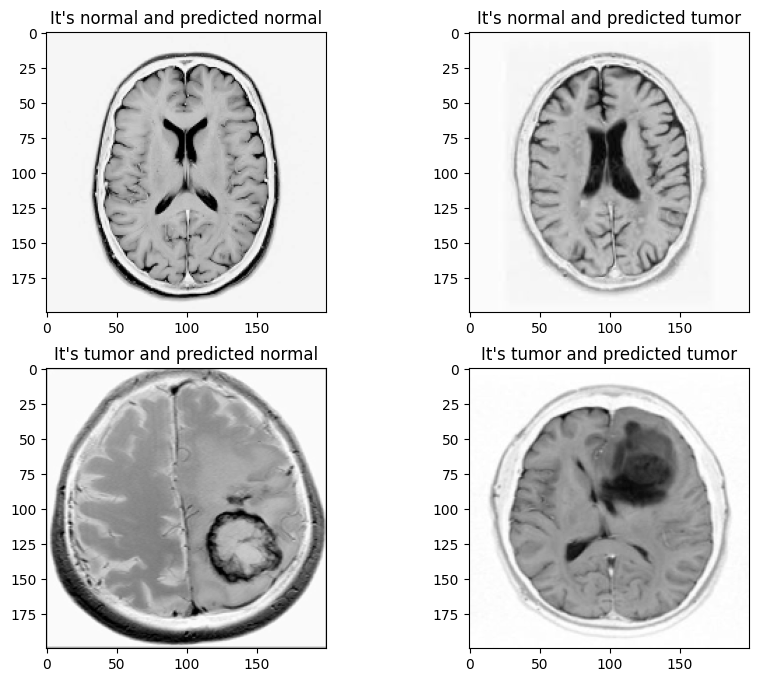

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
axes[0,0].imshow(X_test[2],cmap=plt.cm.binary)
axes[0,0].set_title("It's normal and predicted normal")    

axes[0,1].imshow(X_test[0],cmap=plt.cm.binary)
axes[0,1].set_title("It's normal and predicted tumor") 

axes[1,0].imshow(X_test[8],cmap=plt.cm.binary)
axes[1,0].set_title("It's tumor and predicted normal") 

axes[1,1].imshow(X_test[1],cmap=plt.cm.binary)
axes[1,1].set_title("It's tumor and predicted tumor") 

plt.show()

In [18]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.80      0.76        20
           1       0.86      0.81      0.83        31

    accuracy                           0.80        51
   macro avg       0.79      0.80      0.80        51
weighted avg       0.81      0.80      0.81        51

